Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models.
    4. Model Evaluation and concluding with the best of the model.
    
    
   

### Importing the data

In [102]:
# use these links to do so:

# use these links to do so:
import numpy as np
import pandas as pd
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt


import seaborn as sns
sns.set()
sns.set_style("white")


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

In [59]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see two discrepancy with our Dataset.
1. The categorical variable Senior Citizen is treated as a numeric variable.
2. The numeric variable Total Charges is treated as an Object.

In [62]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Currently, we don't have any null/missing values in our Dataset.

In [63]:
df['Churn'].value_counts() #This is our target variable which is currently a string object.

No     5174
Yes    1869
Name: Churn, dtype: int64

In [64]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### Data Manipulation

We convert the Total Charges feature to numeric. And map our target variable to 0/1 to make classification on it.

In [65]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen']=df['SeniorCitizen'].map({1:'Yes',0:'No'})

In [66]:
df.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

When we coverted our Feature Total Charges we get some null values introduced. Hence, we need to drop them.

In [67]:
df.dropna(inplace=True)

In [68]:
df.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [69]:
df['Churn'].unique()

array([0, 1], dtype=int64)

We store numerical features and categorical features in seperate list to process them seperatley for our model.

In [70]:
catcols=[]
numcols=[]
for i in df.columns:
    if (df[i].dtype != "float64") and (df[i].dtype != 'int64'):
        catcols.append(i)
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        numcols.append(i)
        

### Data Visualization

Distribution of our Numeric features used for predicting out target variable Churn.
Quite clearly all Churn and Total Charges distributions are Right skewed. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192A6C2F438>,
      dtype=object)

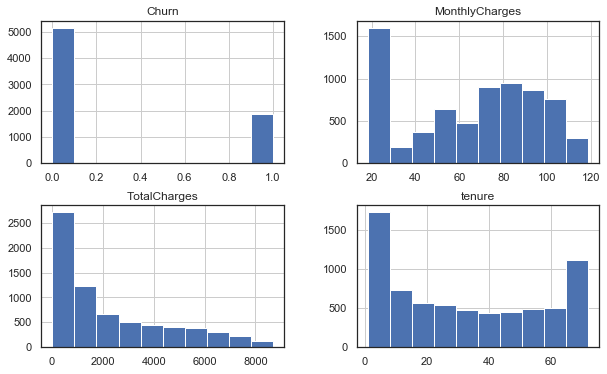

In [71]:
df.hist(figsize=(10,6))

DistributionS of our Categorical features.

In [72]:
catcols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

All customerID are unique hence not of any use to us.

In [73]:
catcols.remove('customerID')

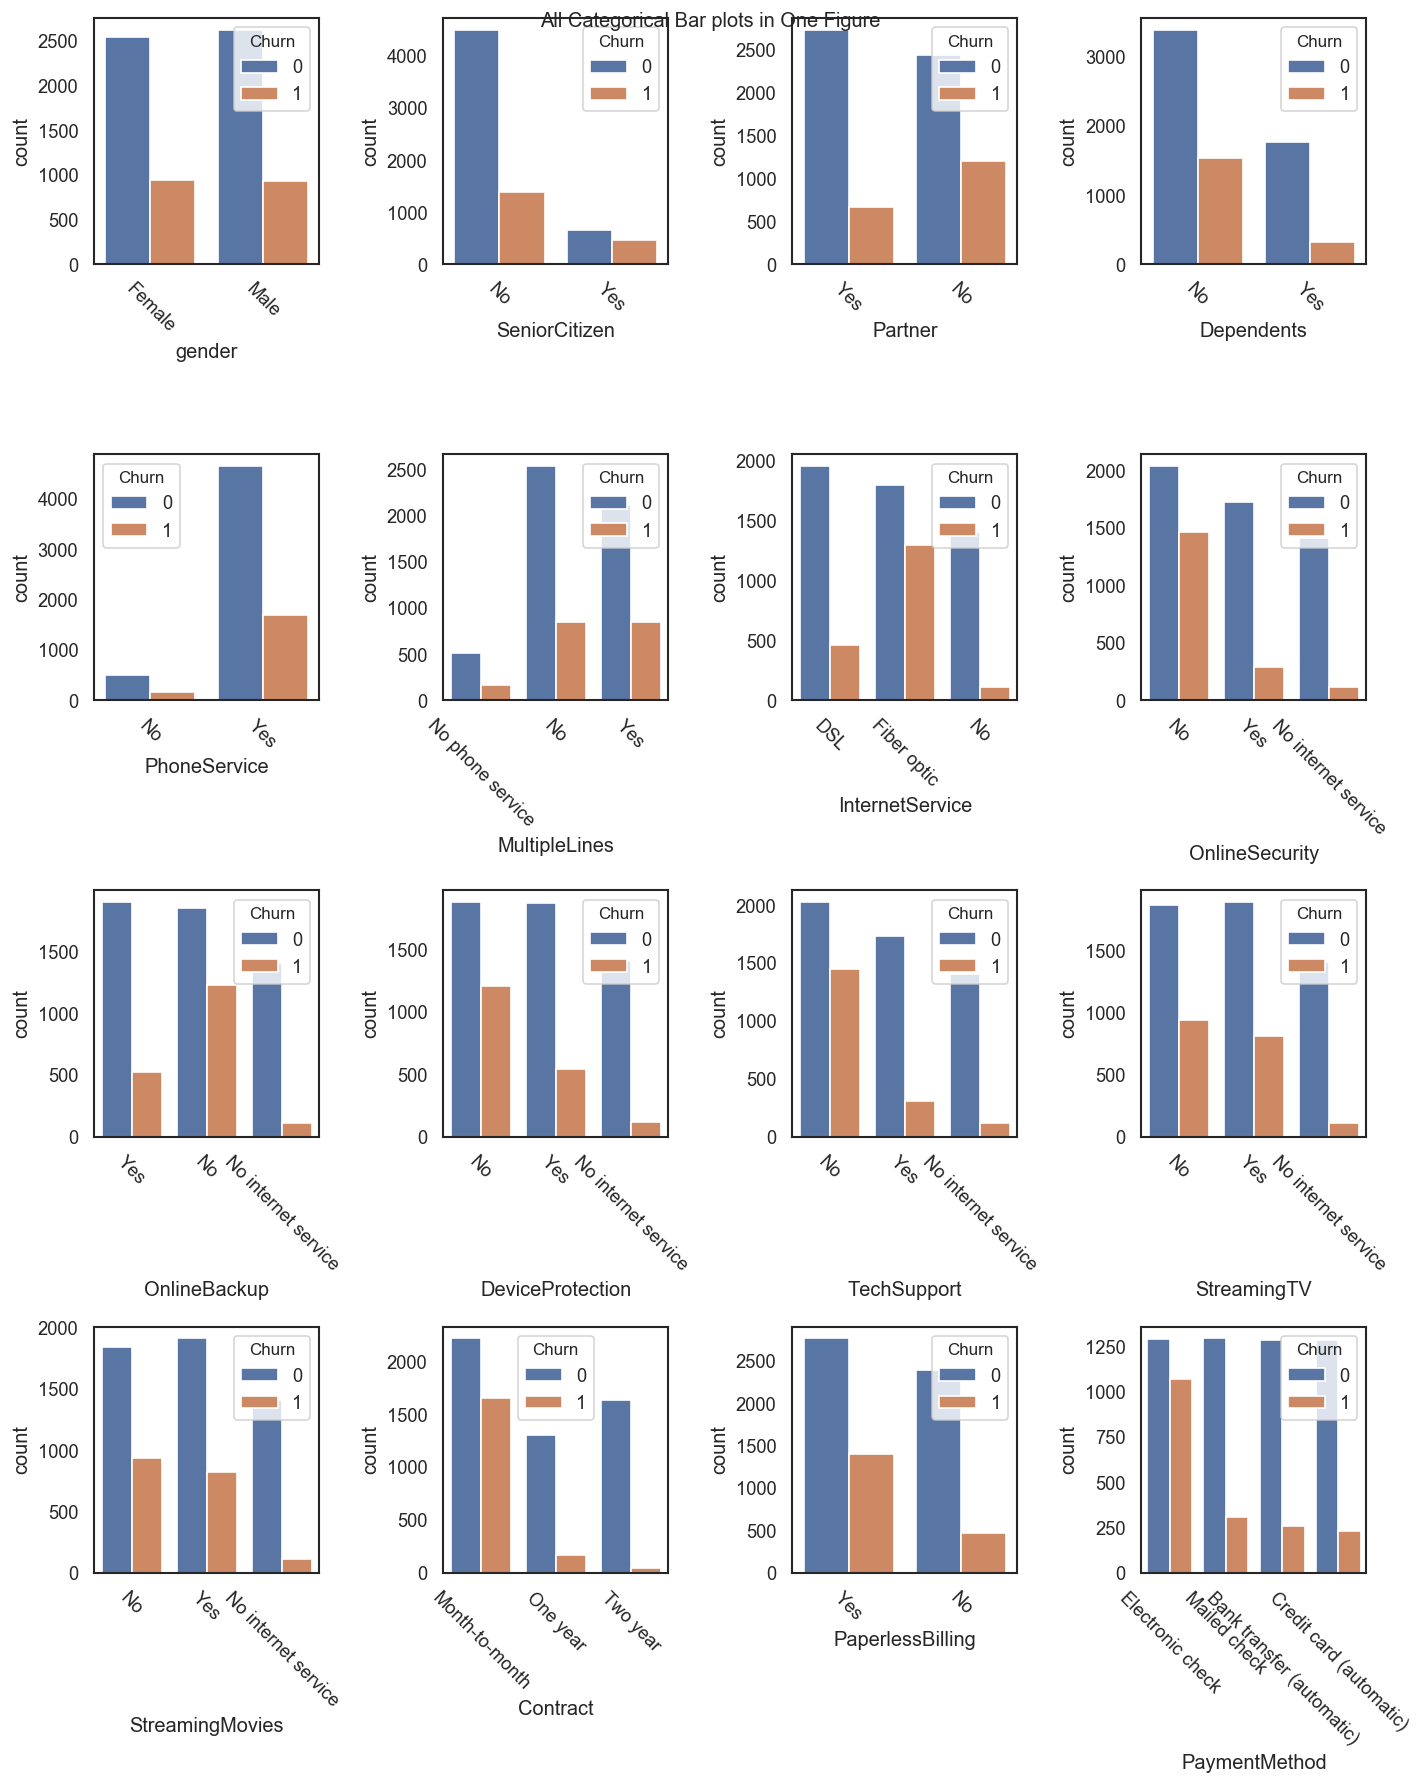

In [74]:
_, axes = plt.subplots(nrows=4, ncols=4,sharex=False,sharey=False, figsize=(12, 15),dpi=120)

for ax,j in zip(axes.ravel(),catcols):
    sns.countplot(x=j,hue='Churn', data=df, ax=ax)
    ax.tick_params(axis ='x', rotation = -45)
    
plt.suptitle('All Categorical Bar plots in One Figure', verticalalignment='bottom', fontsize=12)    
plt.tight_layout()
plt.show()




#An observation: 
When fibre optic is enabled, the churn rate is much higher; the usage of the fibre optic by the customer is a strong feature. We do not observe the same effect with DSL or no Internet Service.

Similarly for, 
    No TechSupport
    
    No Online Backup
    
    Month-tomonth Contract
    
    No OnlineSecurity
    
    PaymentMethod Electronic check
    
    No DeviceProtection


Checking the spread of our numrical features using a BOXPLOT:

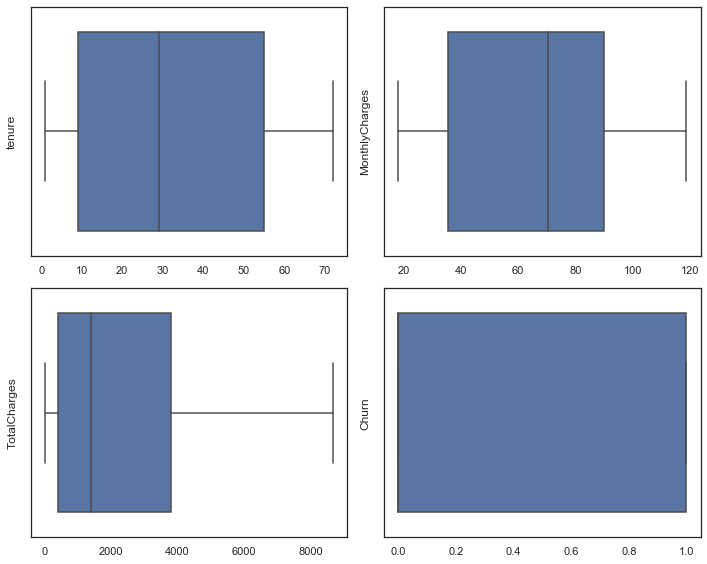

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for ax, feat in zip(ax.ravel(),numcols):
    #ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();



Spread wrt Our Target Varaibles, Churn.

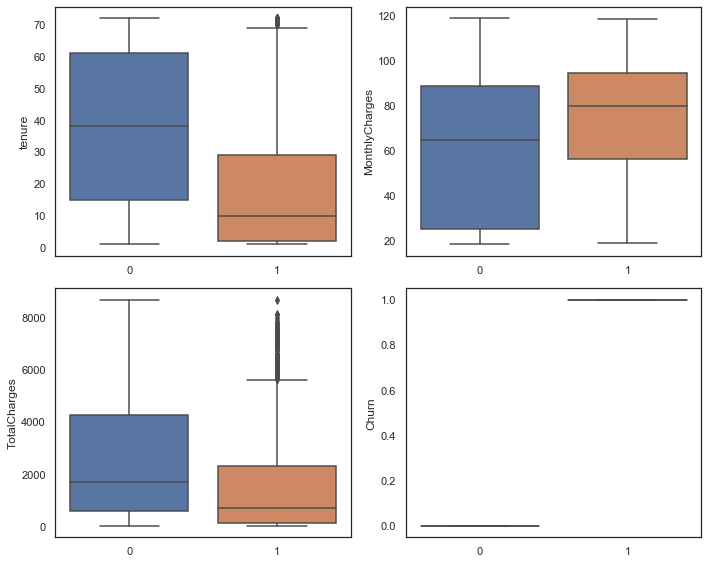

In [76]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for ax, feat in zip(ax.ravel(),numcols):
    #ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();



Correlation between our Numerical Features:

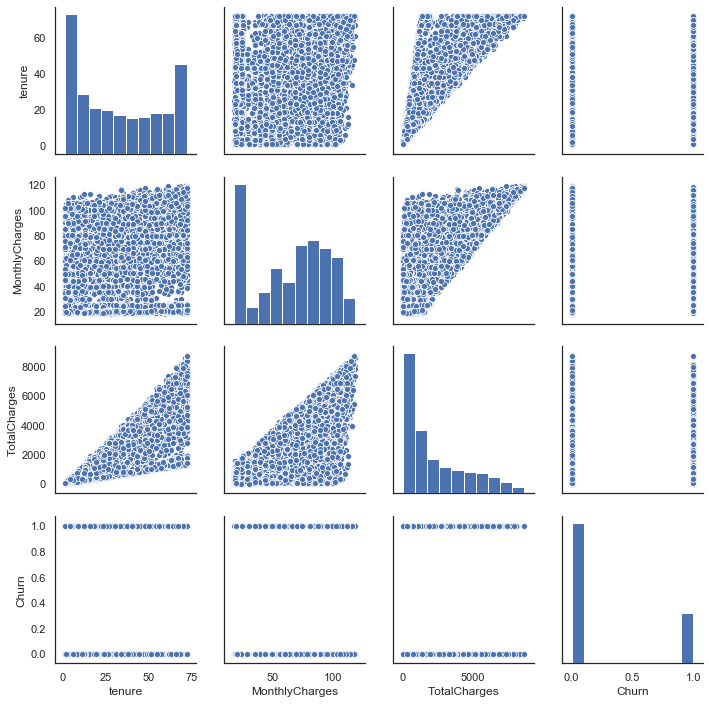

In [77]:

%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numcols]);

The scatterplot of Tenure and Total Charges seems highly correlated.
Similarly, Total Charges and Monthly Charges are also correlated to some extent.

Let's plot a Correlation Matrix to see the exact values. 

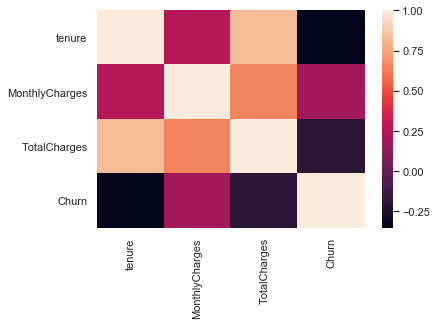

In [78]:
corr_matrix = df[numcols].corr()
sns.heatmap(corr_matrix);

In [79]:
# creating a list of only numerical values
data = [
    go.Heatmap(
        z= df[numcols].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numcols].columns.values,
        y=df[numcols].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

Tenure and Total Charges are the most correlated features among our dataset with CORR of 0.8.

Total Charges and Monthly Charges are also correlated pretty well wil=th a corr of 0.6.

Scatter Plot for the features Montly Charges and Total Charges wrt to our target variable !

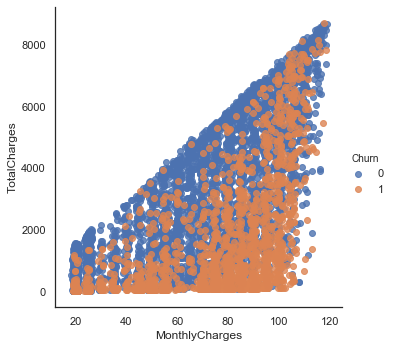

In [80]:
sns.lmplot('MonthlyCharges', 'TotalCharges', data=df, hue='Churn', fit_reg=False);

Scatter Plot for the features Montly Char and Total Charges wrt to our target variable !

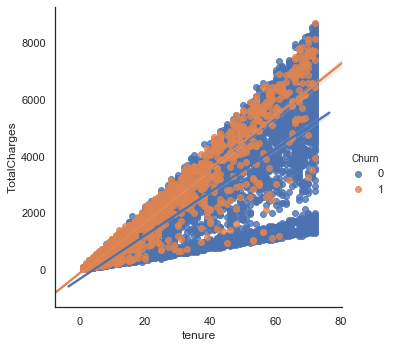

In [81]:
sns.lmplot('tenure', 'TotalCharges', data=df, hue='Churn', fit_reg=True);

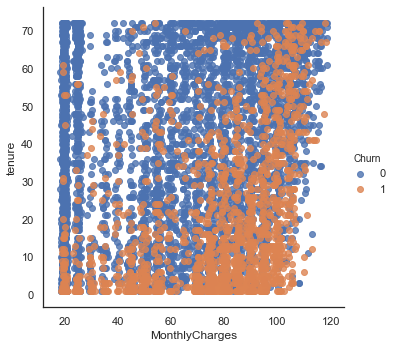

In [82]:
sns.lmplot('MonthlyCharges', 'tenure', data=df, hue='Churn', fit_reg=False);

Scatter plot of two variables with their individual Distribution all in one plot.

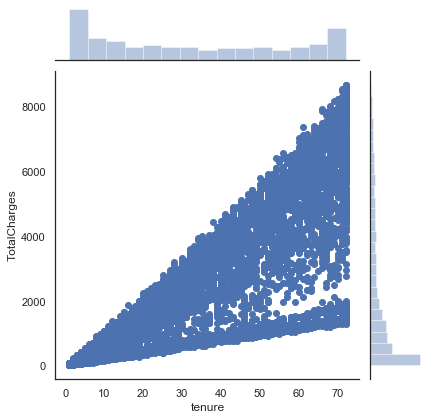

In [83]:
sns.jointplot(x='tenure', y='TotalCharges', data=df[numcols])


Text(0, 0.5, 'Probability Density')

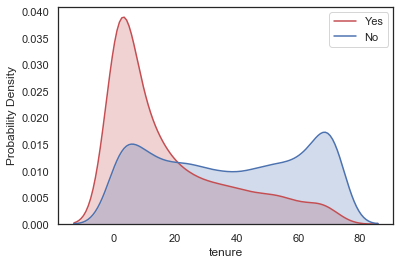

In [84]:
sns.kdeplot(df.loc[(df['Churn']==1), 
            'tenure'], color='r', shade=True, Label='Yes') 
  
sns.kdeplot(df.loc[(df['Churn']==0), 
            'tenure'], color='b', shade=True, Label='No') 
plt.xlabel('tenure') 
plt.ylabel('Probability Density') 

Quite clearly as it was evident from the box plot, the density plot confirms the churn peaks for tenure near to 10.

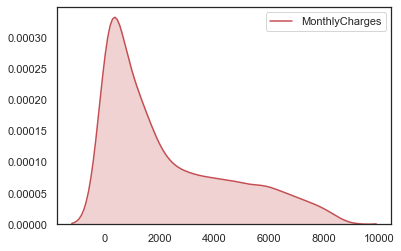

In [85]:
sns.kdeplot(df.TotalCharges, color='r', shade=True, Label='MonthlyCharges') 

Plotting The Ordinal/Numeircal Variable 'tenure' wrt to Numerical feature 'MontlyCharges' wrt Target Variable 'Churn'. 

Plotting 3 dimensions on a 2d plot

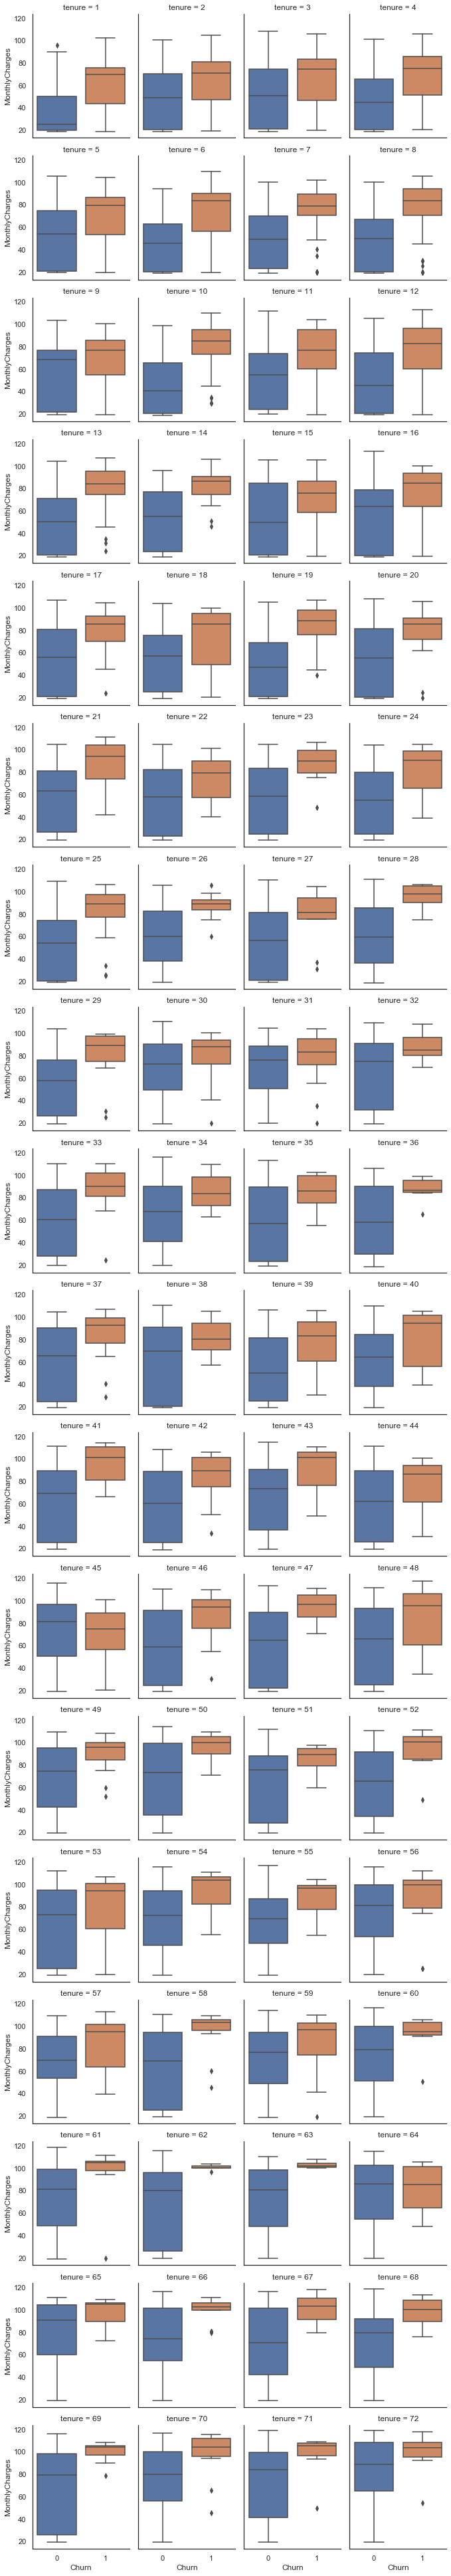

In [86]:
sns.catplot(x='Churn', y='MonthlyCharges', col='tenure',
               data=df, kind="box",
               col_wrap=4, height=3, aspect=.8);

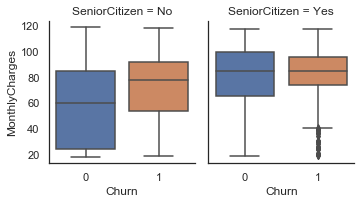

In [87]:
sns.catplot(x='Churn', y='MonthlyCharges', col='SeniorCitizen',
               data=df, kind="box",
               col_wrap=4, height=3, aspect=.8);

### Implement Machine Learning Models

In [91]:
df_cat=df[catcols]

In [92]:
for col in catcols:
    df_cat[col] = pd.factorize(df[col])[0]
df_cat.head(3)    

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,1
2,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1


In [93]:
df_num=df[numcols]
df_num=df_num.drop(['Churn'], axis=1) # Dropping the target column
# Concat the two dataframes together columnwise
df_final = pd.concat([df_num, df_cat], axis=1)


In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
tenure              7032 non-null int64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
dtypes: float64(2), int64(17)
memory usage: 1.4 MB


In [95]:
y_train=df['Churn']

In [96]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df_final, y_train)

In [97]:
y_train.shape
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5163, 1: 5163})


In [98]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_res, y_res, test_size=0.3, random_state=17)


In [103]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)
lgb_clf = LGBMClassifier(random_state=17)

rfc = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=17)

logit = LogisticRegression(C=1, solver='lbfgs', max_iter=500,
                           random_state=17, n_jobs=4,
                          multi_class='multinomial')
logit_pipe = Pipeline([('scaler', StandardScaler()), 
                       ('logit', logit)])

xgb_clf = XGBClassifier(random_state=17)




# for kNN, we need to scale features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)


In [104]:
tree.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
rfc.fit(X_train_scaled, y_train)
logit_pipe.fit(X_train, y_train)
lgb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=17,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [105]:
logit_val_pred = logit_pipe.predict(X_holdout)
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout_scaled)
lgb_pred=lgb_clf.predict(X_holdout)

xgb_pred=xgb_clf.predict(X_holdout)



In [132]:
tree.score(X_train, y_train)
tree.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
rfc.fit(X_train_scaled, y_train)
logit_pipe.fit(X_train, y_train)
lgb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

0.8231876037631434

In [134]:
print('Training Set Accuracy of Logistic Regression Model:',logit_pipe.score(X_train, y_train))
print('Training Set Accuracy of our Decision Tree Model:',tree.score(X_train, y_train))
print('Training Set Accuracy of KNN Model:',knn.score(X_train_scaled, y_train))
print('Training Set Accuracy of LightGBM Model:',lgb_clf.score(X_train, y_train))
print('Training Set Accuracy of XgBoost Model:',xgb_clf.score(X_train, y_train))
print('Training Set Accuracy of Random Forest Model:',rfc.score(X_train_scaled, y_train))

Accuracy of Logistic Regression Model: 0.7755949086884338
Accuracy of our Decision Tree Model: 0.8231876037631434
Accuracy of KNN Model: 0.8303818483674599
Accuracy of LightGBM Model: 0.9204482567791921
Accuracy of XgBoost Model: 0.8723021582733813
Accuracy of Random Forest Model: 0.8426950747094631


### Model Evaluation

In [106]:
from sklearn.metrics import accuracy_score

In [109]:
print('Accuracy of Logistic Regression Model:',accuracy_score(y_holdout, logit_val_pred))
print('Accuracy of our Decision Tree Model:',accuracy_score(y_holdout, tree_pred))# 0.94
print('Accuracy of KNN Model:',accuracy_score(y_holdout, knn_pred)) # 0.
print('Accuracy of LightGBM Model:',accuracy_score(y_holdout,lgb_pred))
print('Accuracy of XgBoost Model:',accuracy_score(y_holdout,xgb_pred))

Accuracy of Logistic Regression Model: 0.7785668173014848
Accuracy of our Decision Tree Model: 0.8124596513879923
Accuracy of KNN Model: 0.7853453841187863
Accuracy of LightGBM Model: 0.8540994189799871
Accuracy of XgBoost Model: 0.8534538411878632


After fitting list of all the trees are stored in estimators_ property

In [110]:
tree_list = rfc.estimators_
tree_list

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1265576559, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=780729585, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                        max_features='auto', max_leaf_nodes=None,
                        min

In [112]:
#print(feature_names)
print(rfc.feature_importances_)

[8.64412825e-02 1.48997857e-02 4.20508674e-02 8.58375945e-03
 5.34477565e-03 1.88929257e-02 1.05652047e-02 5.64375614e-05
 5.94262615e-03 2.70350752e-02 3.28228153e-01 1.42784542e-02
 6.19641024e-02 6.19025741e-02 4.60240717e-02 1.20519652e-03
 1.79001588e-01 5.08252433e-02 3.67578764e-02]


In [114]:
pd.DataFrame(rfc.feature_importances_,
             index=df_final.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)

,Importance
OnlineSecurity,0.328228
Contract,0.179002
tenure,0.086441
DeviceProtection,0.061964
TechSupport,0.061903
PaperlessBilling,0.050825
StreamingTV,0.046024
TotalCharges,0.042051
PaymentMethod,0.036758
InternetService,0.027035


In [115]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             pre_dispatch='2*n_jobs

In [116]:
#Let's list the best parameters and the corresponding mean accuracy from cross-validation.
tree_grid.best_params_ #{'max_depth': 6, 'max_features': 17}

{'max_depth': 7, 'max_features': 13}

For our Decision Tree Classifier:
    
    Max Depth= 7
    
    Max_features=13 
    
    is the optimal solution for our Dataset.

Accuracy with the best_params_ for our Model on training set is:

In [118]:
tree_grid.best_score_ 

0.8254012174875485

In [119]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout)) 

0.8227888960619755

In [120]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

#Best Parametr for KNN model

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.6s finished


({'knn__n_neighbors': 1}, 0.8038184836745987)

In [121]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) 

0.8050355067785668

In [128]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.8507215403777263


In [129]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ 

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.9min finished


({'max_depth': 11, 'max_features': 8}, 0.8540398450470393)

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Training Data Accuracy: 0.92
Test Data Accuracy:     0.85
[[1393  178]
 [ 274 1253]]


Precision:              0.88
Recall:                 0.82


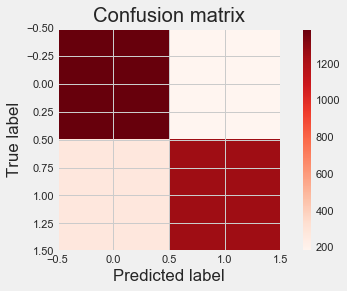

In [131]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#y_tr=np.ravel(y_tr)
train_acc=lgb_clf.score(X_train, y_train)
test_acc=lgb_clf.score(X_holdout, y_holdout)

print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))
    
y_true = y_holdout
y_pred = lgb_clf.predict(X_holdout)


conf = confusion_matrix(y_true, y_pred)
print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[1, 1] / (conf[1, 1] + conf[0, 1])))
print ("Recall:                 %0.2f"% (conf[1, 1] / (conf[1, 1] + conf[1, 0])))
    
cm=confusion_matrix(y_true, y_pred, labels=[0, 1])
    
plt.figure()
plot_confusion_matrix(cm)

In [138]:
probs = lgb_clf.predict_proba(X_holdout)
probs.shape

(3098, 2)

AUC: 0.937


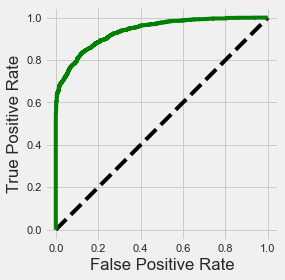

In [139]:
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_holdout, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_holdout, probs)
#print(fpr) #1-SPECIFICITY/PRECISION
#print(tpr) #SENSTIVITY OR RECALL
#print(thresholds)
# plot no skill
#pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#pyplot.plot(fpr, tpr, marker='.')
# show the plot
#pyplot.show()

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1], linestyle='--', color = 'black')
plt.plot(fpr, tpr, color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.gca().set_aspect('equal', adjustable='box')

### Final Conclusions

Here, the lightGBM proved to be better than the rest: 92%/ 85% accuracy fort training data and test-set respectively. Decision trees perform very well, and even random forest.